In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
df = pd.read_csv("D:\Study\BA\TEST\Linear\housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [4]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [5]:
#droping the useless variable
df = df.drop(['id','url','region','region_url','image_url','description'],axis=1)

In [6]:
df.nunique()

price                       3961
type                          12
sqfeet                      3277
beds                          11
baths                         20
cats_allowed                   2
dogs_allowed                   2
smoking_allowed                2
wheelchair_access              2
electric_vehicle_charge        2
comes_furnished                2
laundry_options                5
parking_options                7
lat                        56772
long                       54035
state                         51
dtype: int64

In [7]:
#Pre-Processing the DATA
#Missing Value Treatment

In [8]:
df.isnull().sum()

price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64

In [9]:
df.laundry_options = df.laundry_options.fillna(df['laundry_options'].mode()[0])

In [10]:
df.parking_options = df.parking_options.fillna(df['parking_options'].mode()[0])

In [11]:
df.lat = df.lat.fillna(df['lat'].mean())

In [12]:
df.long = df.long.fillna(df['long'].mean())

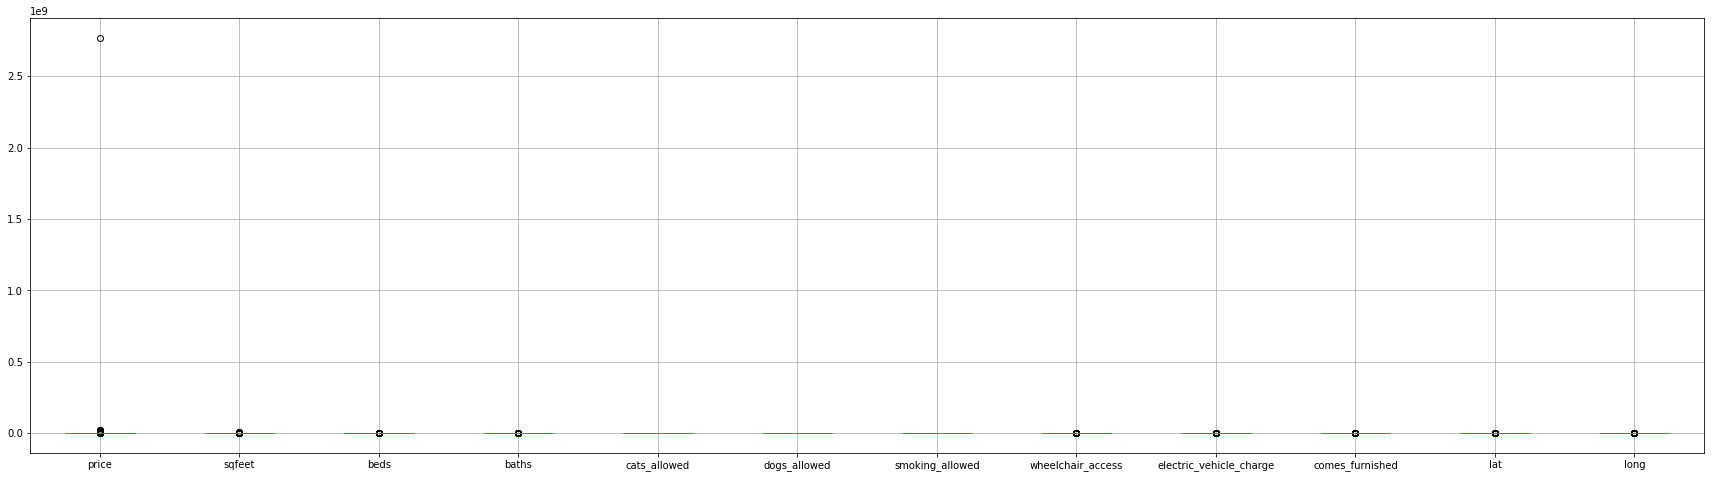

In [13]:
df.boxplot(figsize=(30,8))

In [14]:
min=df['price'].quantile(0.05)
max=df['price'].quantile(0.95)
new=np.where(df['price']<min,min,df['price'])
df.price=new
new=np.where(df['price']>max,max,df['price'])
df.price=new

In [15]:
min=df['sqfeet'].quantile(0.05)
max=df['sqfeet'].quantile(0.95)
new=np.where(df['sqfeet']<min,min,df['sqfeet'])
df.sqfeet=new
new=np.where(df['sqfeet']>max,max,df['sqfeet'])
df.sqfeet=new

In [16]:
min=df['beds'].quantile(0.05)
max=df['beds'].quantile(0.95)
new=np.where(df['beds']<min,min,df['beds'])
df.beds=new
new=np.where(df['beds']>max,max,df['beds'])
df.beds=new

In [17]:
min=df['baths'].quantile(0.05)
max=df['baths'].quantile(0.95)
new=np.where(df['baths']<min,min,df['baths'])
df.baths=new
new=np.where(df['baths']>max,max,df['baths'])
df.baths=new

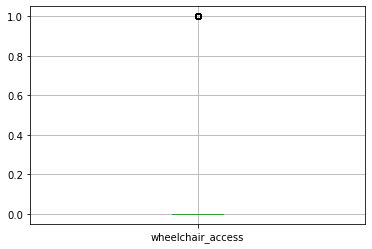

In [18]:
df.boxplot('wheelchair_access')

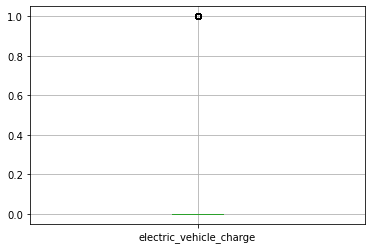

In [19]:
df.boxplot('electric_vehicle_charge')

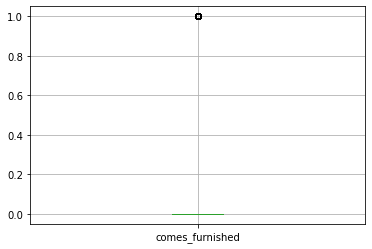

In [20]:
df.boxplot('comes_furnished')

In [21]:
min=df['long'].quantile(0.05)
max=df['long'].quantile(0.95)
new=np.where(df['long']<min,min,df['long'])
df.long=new
new=np.where(df['long']>max,max,df['long'])
df.long=new

In [22]:
min=df['lat'].quantile(0.05)
max=df['lat'].quantile(0.95)
new=np.where(df['lat']<min,min,df['lat'])
df.lat=new
new=np.where(df['lat']>max,max,df['lat'])
df.lat=new

In [23]:
corr = df.corr()
corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
price,1.000000,0.359760,0.199046,0.298923,-0.028755,-0.022122,-0.165341,0.071598,0.117325,0.008886,0.060019,-0.197855
sqfeet,0.359760,1.000000,0.775170,0.701624,-0.077941,-0.035875,-0.036048,-0.016624,0.005507,0.008943,0.020885,0.073267
beds,0.199046,0.775170,1.000000,0.662077,-0.068734,-0.033793,-0.009782,-0.034978,-0.015991,0.005177,0.042250,0.023894
baths,0.298923,0.701624,0.662077,1.000000,-0.006286,0.033593,-0.008560,0.015447,0.008522,0.014225,-0.088372,-0.013435
cats_allowed,-0.028755,-0.077941,-0.068734,-0.006286,1.000000,0.887297,0.017029,0.122366,0.049356,-0.058884,-0.016147,0.020191
dogs_allowed,-0.022122,-0.035875,-0.033793,0.033593,0.887297,1.000000,0.013796,0.129112,0.049274,-0.037666,-0.060366,0.005241
smoking_allowed,-0.165341,-0.036048,-0.009782,-0.008560,0.017029,0.013796,1.000000,-0.223623,-0.096017,-0.161351,-0.185086,0.159481
wheelchair_access,0.071598,-0.016624,-0.034978,0.015447,0.122366,0.129112,-0.223623,1.000000,0.193245,0.195817,0.003903,-0.028282
electric_vehicle_charge,0.117325,0.005507,-0.015991,0.008522,0.049356,0.049274,-0.096017,0.193245,1.000000,0.069611,0.027735,-0.065967
comes_furnished,0.008886,0.008943,0.005177,0.014225,-0.058884,-0.037666,-0.161351,0.195817,0.069611,1.000000,0.005861,-0.020810


In [24]:
#converting Categorical into binary for analysis

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['laundry_options'] = le.fit_transform(df['laundry_options'])
df['parking_options'] = le.fit_transform(df['parking_options'])
df['type'] = le.fit_transform(df['type'])
df['state'] = le.fit_transform(df['state'])

In [26]:
#Applying Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [28]:
y = df['price']
x = df.drop(['price','laundry_options','parking_options','type','state'],axis=1)

In [29]:
Rtree = RandomForestRegressor()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [31]:
Rtree.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
Rtree.score(x_test,y_test)

0.8678784101670372

In [33]:
Ry_pred = Rtree.predict(x_test)

In [34]:
importances = list(Rtree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_test, importances)]
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sqfeet               Importance: 0.21
Variable: beds                 Importance: 0.02
Variable: baths                Importance: 0.02
Variable: cats_allowed         Importance: 0.01
Variable: dogs_allowed         Importance: 0.01
Variable: smoking_allowed      Importance: 0.01
Variable: wheelchair_access    Importance: 0.01
Variable: electric_vehicle_charge Importance: 0.0
Variable: comes_furnished      Importance: 0.01
Variable: lat                  Importance: 0.24
Variable: long                 Importance: 0.45
